>Jacob Lustig-Yaeger  

>January 20+, 2016  

# Stratification of the solar atmosphere  

In this exercise we study the radial stratification of the solar atmosphere on the basis of the standard model FALC by Fontenla et al. (1993). They derived this description of the solar photosphere and chromosphere empirically, assuming that the solar atmosphere is horizontally homogeneous ("plane parallel layers") and in hydrostatic equilibrium ("time independent").

We will use that FLAC data file: `falc.dat`.

In [1]:
! head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [2]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np
import scipy as sp
import pdb
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)
G = 6.67e-8           # Gravitational constant

# Define function for color plots
def scalarmap(v,cmap='plasma'):
    import matplotlib.cm as cmx
    import matplotlib.colors as colors
    cm = plt.get_cmap(cmap)
    cNorm  = colors.Normalize(vmin=np.min(v), vmax=np.max(v))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colors = scalarMap.to_rgba(v)
    return colors,scalarMap,cNorm

In [3]:
# Read-in FALC model
falc = np.genfromtxt('falc.dat', skip_header=4)
height = falc[:,0]
tau500 = falc[:,1]
colm = falc[:,2]
temp = falc[:,3]
vturb = falc[:,4]
nhyd = falc[:,5]
nprot = falc[:,6]
nel = falc[:,7]
ptot = falc[:,8]
pgasptot = falc[:,9]
dens = falc[:,10]

/astro/users/jlustigy/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


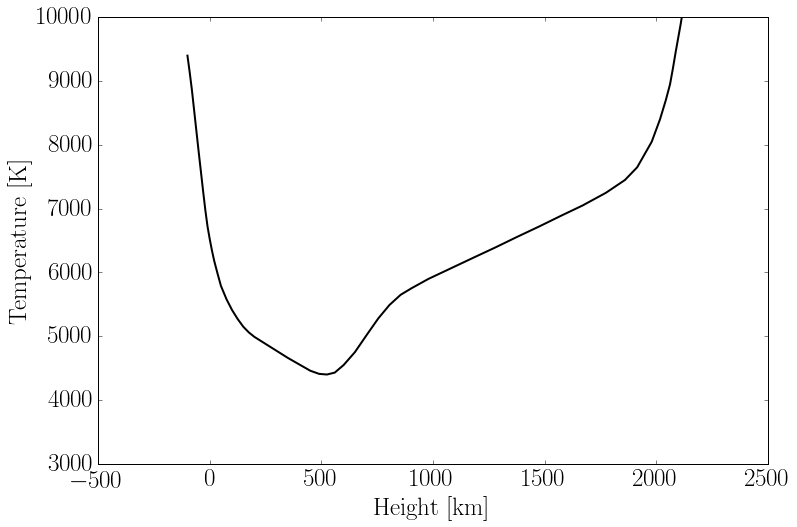

In [4]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,temp, lw=2.0, c='k')      
ax0.legend()
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Temperature [K]")
ax0.set_ylim([3000,10000])
plt.show()

# 1.2 FALC density stratification

**Plot the total pressure $p_{tot}$ against the column mass $m$, both linearly and logarithmically. You will find that they scale linearly. Explain what assumption has caused $p_{tot} = c m$ and determine the value of the solar surface gravity $g_{surf} = c$ that went into the FALC-producing code.**

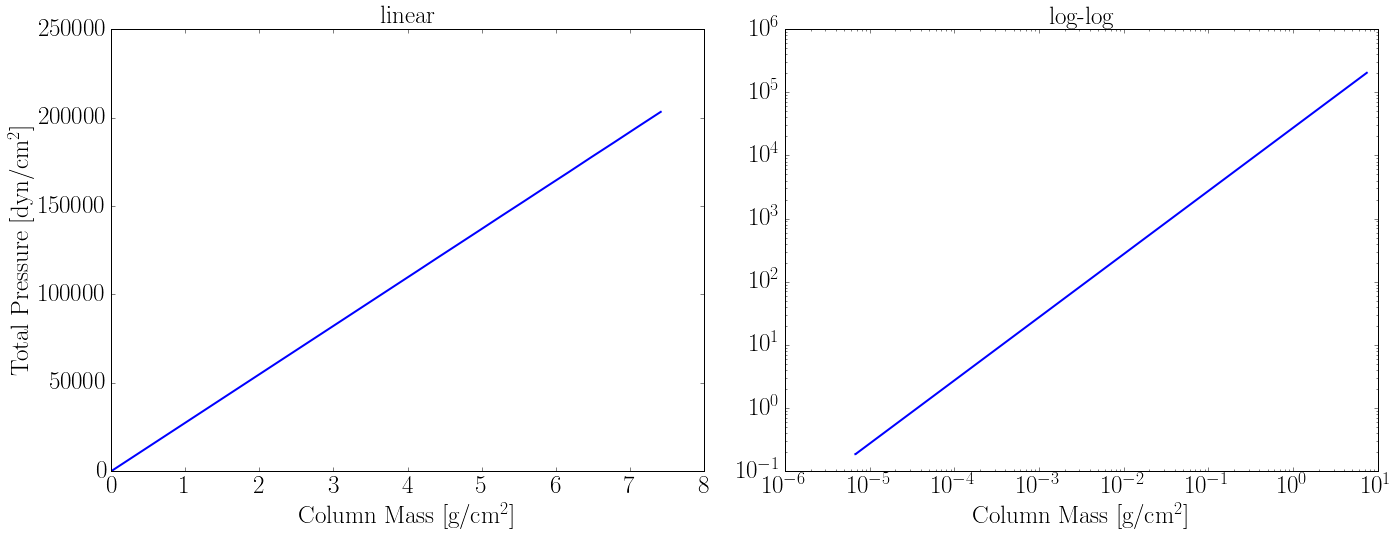

In [5]:
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
ax0.plot(colm,ptot, lw=2.0)      
ax0.set_xlabel(r"Column Mass [g/cm$^2$]")
ax0.set_ylabel(r"Total Pressure [dyn/cm$^2$]")
#ax0.set_xlim([1000,21000])
ax0.set_title('linear')

ax1 = plt.subplot(gs[1])
ax1.plot(colm,ptot,lw=2.0)      
ax1.set_xlabel(r"Column Mass [g/cm$^2$]")
ax1.loglog()
ax1.set_title('log-log')
#ax1.set_xlim([1000,21000])

fig.tight_layout()
plt.show()

**Fontenla et al. (1993) also assumed complete mixing, i.e., the same element mix at all heights. Check this by plotting the ratio of the hydrogen mass density to the total mass density against height (the hydrogen atom mass is $m_{H} = 1.67352 \times 10^{-24}$ g, e.g., Allen 1976). Then add helium to hydrogen using their abundance and mass ratios ($N_{He} /N_H = 0.1, m_{He} = 3.97 m_{H}$), and estimate the fraction of the total mass density made up by the remaining elements in the model mix (the "metals").**

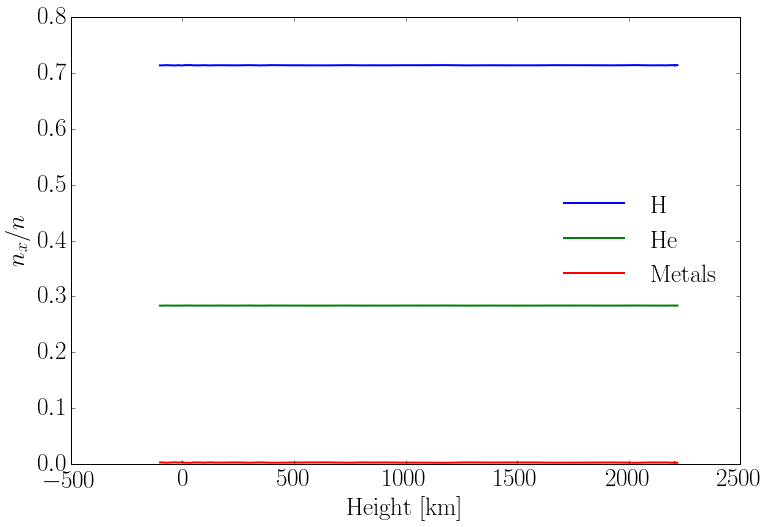

In [6]:
fH = nhyd*mH/dens
fHe = 0.1*nhyd*mHe/dens 
nHe = 0.1*nhyd
fZ = 1.0 - fH -fHe

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,fH, lw=2.0, label="H")
ax0.plot(height,fHe, lw=2.0, label="He")
ax0.plot(height,fZ, lw=2.0, label="Metals")
leg = ax0.legend(loc=5)
leg.get_frame().set_alpha(0.0)
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"$n_{x}/n$")
#ax0.semilogy()
plt.show()

In [7]:
print "Fraction of total mass density made up by metals:", np.mean(fZ)

Fraction of total mass density made up by metals: 0.00222580708084


**Plot the column mass against height.**

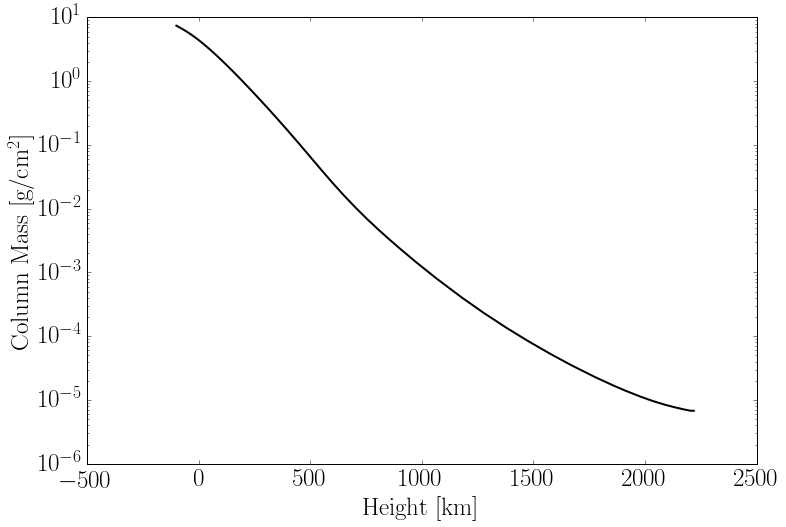

In [8]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,colm, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Column Mass [g/cm$^2$]")
ax0.semilogy()
plt.show()

**The curve becomes nearly straight when you make the y-axis logarithmic. Why is that? Why isn’t it exactly straight?**  

>Ans  

**Plot the gas density against height. Estimate the density scale height $H_{\rho}$ in $\rho \approx \rho(0) \exp(^{-h}/_{H\rho})$ in the photosphere.**

In [9]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

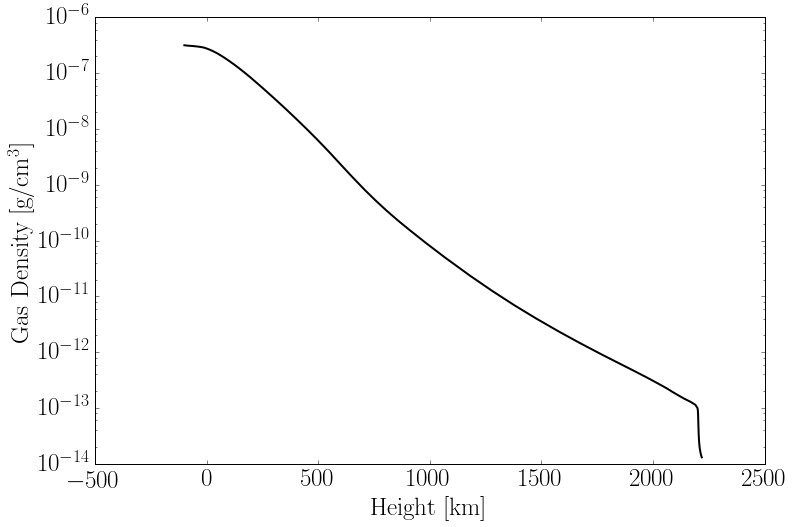

In [10]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,dens, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Gas Density [g/cm$^3$]")
ax0.semilogy()
plt.show()

In [11]:
Hrho = k * 5770. / 0.7 / mH / (G*Msun/Rsun**2) / 1e5

print "Pressure Scale Height in the solar photosphere: ", Hrho, 'km'

Pressure Scale Height in the solar photosphere:  248.31562804 km


**Compute the gas pressure and plot it against height. Overplot the product $(n_{H} + n_{e}) kT$. Plot the ratio
of the two curves to show their differences.**

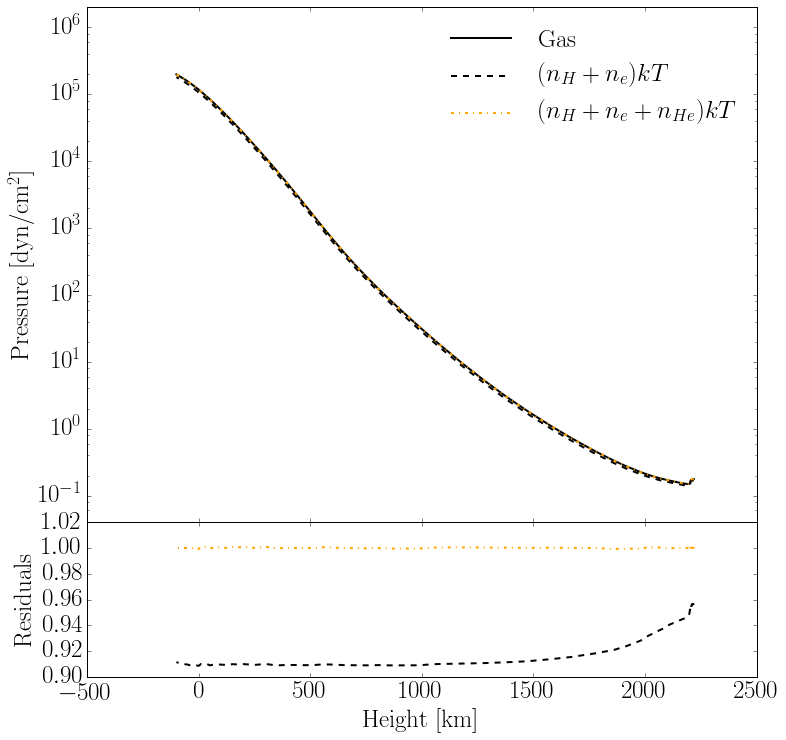

In [12]:
# Compute gas pressure
pgas = ptot * pgasptot

Pe = (nhyd + nel)*k*temp
PeHe = (nhyd + nel + nHe)*k*temp

fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2,1, height_ratios=(1,.3)) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.plot(height,pgas, lw=2.0, c='k', label='Gas')
ax0.plot(height,Pe, lw=2.0, c='k', ls='--', label=r'$(n_{H} + n_{e}) kT$')
ax0.plot(height,PeHe, lw=2.0, c='orange', ls='-.', label=r'$(n_{H} + n_{e} + n_{He}) kT$')
ax1.plot(height,Pe/pgas, lw=2.0, c='k', ls='--', label=r'$(n_{H} + n_{e}) kT$')
ax1.plot(height,PeHe/pgas, lw=2.0, c='orange', ls='-.', label=r'$(n_{H} + n_{e} + n_{He}) kT$')
leg = ax0.legend(loc=1)
leg.get_frame().set_alpha(0.0)
plt.setp(ax0.get_xticklabels(), visible=False) 
fig.subplots_adjust(hspace=0.0)
ax1.set_xlabel(r"Height [km]")
ax1.set_ylabel('Residuals')
ax0.set_ylabel(r"Pressure [dyn/cm$^2$]"); ax0.set_ylim([4e-2, 2e6])
ax0.semilogy()
plt.show()

**Do the differences measure deviations from the ideal gas law or something else? Now add the helium density $N_{He}$ to the product and enlarge the deviations.
Comments?**  

>Answer  

**Plot the total hydrogen density against height and overplot curves for the electron density, the proton density, and the density of the electrons that do not result from hydrogen ionization.**

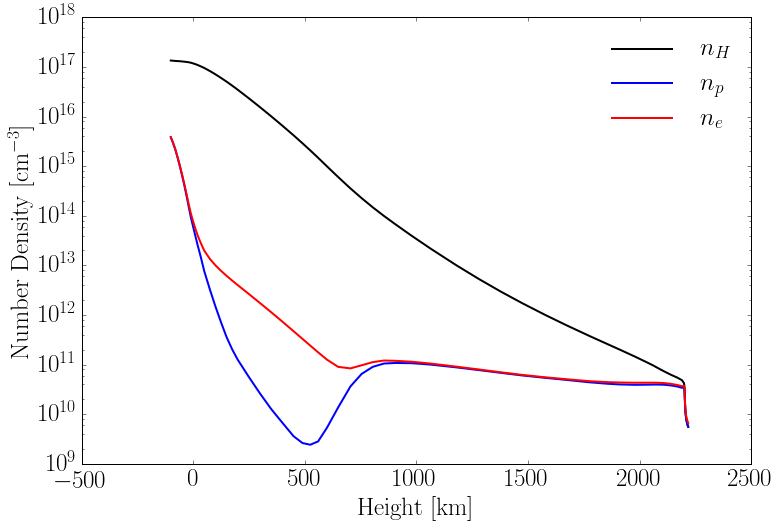

In [13]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,nhyd, lw=2.0, c='k', label=r'$n_{H}$')
ax0.plot(height,nprot, lw=2.0, c='b', label=r'$n_{p}$')
ax0.plot(height,nel, lw=2.0, c='r', label=r'$n_{e}$')
leg = ax0.legend(loc=1) 
leg.get_frame().set_alpha(0.0)
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Number Density [cm$^{-3}$]")
ax0.semilogy()
plt.show()

**Explain their behavior. You may find inspiration in Figure 6 on page 13 (Rutten). The last curve is parallel to the hydrogen density over a considerable height range. What does that imply? And what happens at larger height?**  

>Answer  

**Plot the ionization fraction of hydrogen logarithmically against height.**

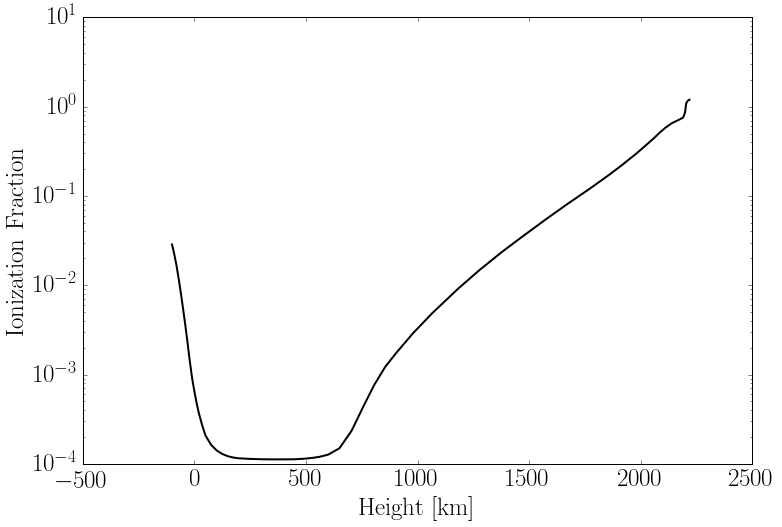

In [14]:
fion = nel/nhyd

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,fion, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Ionization Fraction")
ax0.semilogy()
plt.show()

**Why does this curve look like the one in Figure 2? And why is it tilted with respect to that?**  

>Answer  

**Let us now compare the photon and particle densities. In thermodynamic equilibrium (TE) the radiation
is isotropic with intensity $I_{\nu} = B_{\nu}$ and has total energy density (Stefan Boltzmann) $$ u = \frac{1}{c} \int \int B_{\nu} d \Omega d \nu = \frac{4 \pi}{c} T^4 $$ so that the total photon density for isotropic TE radiation is given, with $u_{\nu} = du/d \nu$, $T$ in K and $N_{phot}$ in photons per cm$^3$, by $$ N_{phot} =\int_0^{\infty} \frac{u_{\nu}}{h \nu} d \nu \approx 20 T^3 $$**

**This equation gives a reasonable estimate for the photon density at the deepest model location, why? Compute the value there and compare it to the hydrogen density. Why is the equation not valid higher up in the atmosphere?**  

>Answer

In [85]:
u = 4. * np.pi / c * temp**4.
Nphot = 20. * temp**3.
print 'Deepest location: ' 
print '-----------------'
print 'N_phot =', Nphot[-1] 
print 'n_hyd =',  nhyd[-1]

Deepest location: 
-----------------
N_phot = 1.661168e+13
n_hyd = 1.351e+17


**The photon density there is $N_{phot} \approx 20 T_{eff}^3/2\pi$ with $T_{eff} = 5770$ K the effective solar temperature (since $\pi B(T_{eff}) = \sigma T_{eff}^3 = F+ = \pi I+$ with $F+ $ the emergent flux and $I+$ the diskaveraged emergent intensity). Compare it to the hydrogen density at the highest location in the FALC model. The medium there is insensitive to these photons (except those at the center wavelength of the hydrogen Ly$\alpha$ line), why?**  

>Answer

In [86]:
Nphoteff = 20. * 5770.**3. / (2*np.pi)
print 'Highest location: ' 
print '-----------------'
print 'N_phot =', Nphoteff 
print 'n_hyd =',  "%e" %nhyd[0]

Highest location: 
-----------------
N_phot = 6.11473396401e+11
n_hyd = 5.575000e+09


# 1.3 Comparison with the earth’s atmosphere  
We will use the data file: `earth.dat`.

In [16]:
! head earth.dat


   0   6.01   288   -2.91   19.41
   1   5.95   282   -2.95   19.36
   2   5.90   275   -3.00   19.31
   3   5.85   269   -3.04   19.28 
   4   5.79   262   -3.09   19.23
   5   5.73   256   -3.13   19.19
   6   5.67   249   -3.18   19.14

   8   5.55   236   -3.28   19.04


**Write code to read file earth.dat.**

In [17]:
# Read earth.dat
earth = np.genfromtxt('earth.dat')
hE=earth[:,0]
pgasE=10.**earth[:,1]
tempE=earth[:,2]
densE=10.**earth[:,3]
npartE=10.**earth[:,4]

**Plot the temperature, pressure, particle density and gas density against height, logarithmically where
appropriate.**

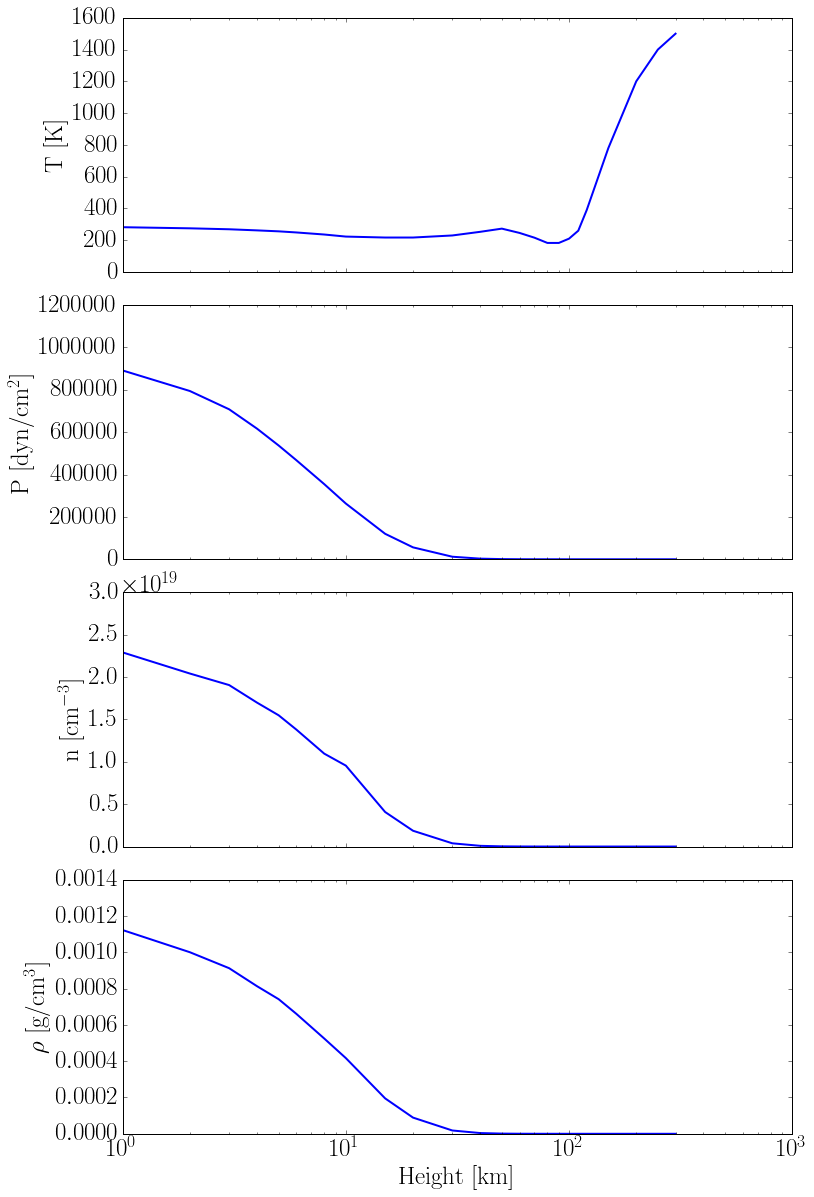

In [18]:
fig = plt.figure(figsize=(12,20))
gs = gridspec.GridSpec(4,1) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax0.plot(hE, tempE, lw=2.0)
ax1.plot(hE, pgasE, lw=2.0)
ax2.plot(hE, npartE, lw=2.0)
ax3.plot(hE, densE, lw=2.0)
plt.setp(ax0.get_xticklabels(), visible=False) 
plt.setp(ax1.get_xticklabels(), visible=False) 
plt.setp(ax2.get_xticklabels(), visible=False) 
fig.subplots_adjust(hspace=0.13)
ax3.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"T [K]")
ax1.set_ylabel(r"P [dyn/cm$^2$]")
ax2.set_ylabel(r"n [cm$^{-3}$]")
ax3.set_ylabel(r"$\rho$ [g/cm$^3$]")
ax0.semilogx()
ax1.semilogx()
ax2.semilogx()
ax3.semilogx()
plt.show()

**Plot the pressure and density stratifications together in normalized units in one graph.**

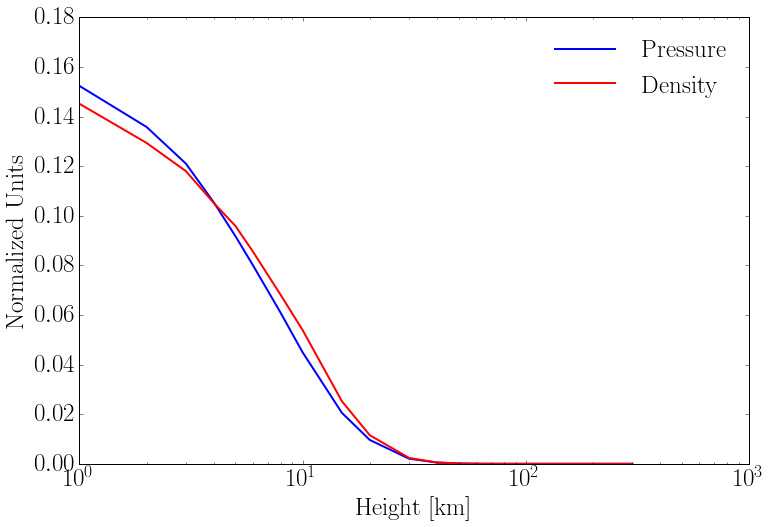

In [19]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(hE,pgasE/np.sum(pgasE), lw=2.0, c='b', label='Pressure')
ax0.plot(hE,densE/np.sum(densE), lw=2.0, c='r', label='Density')
leg = ax0.legend(loc=1); leg.get_frame().set_alpha(0.0)
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Normalized Units")
ax0.semilogx()
plt.show()

**Comments?**  

>Answer  

**Plot the mean molecular weight $\mu_E \equiv m/m_H = \rho/(N m_H)$ against height.**

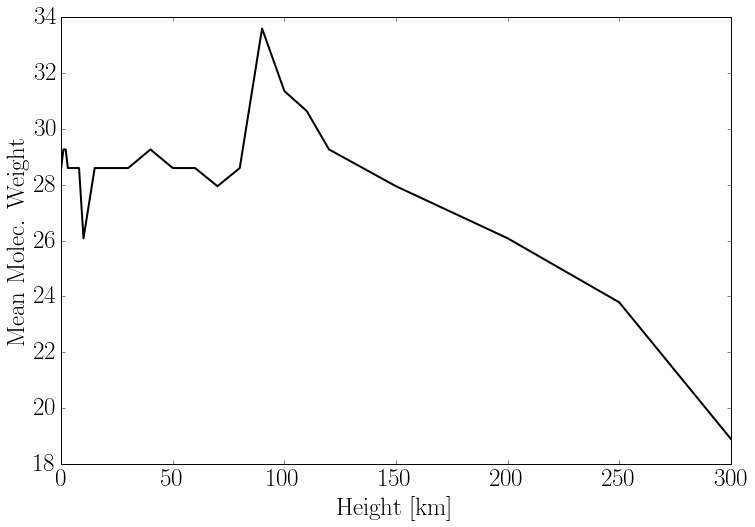

In [20]:
muE = densE / (npartE * mH)

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(hE,muE, lw=2.0, c='k')
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Mean Molec. Weight")
plt.show()

**Why does it decrease in the high atmosphere?**  

>The mean molecular weight decreases high in the atmosphere because only light molecules have enough kinetic energy to climb so high out of the Earth's gravitational well. Note from the above plot of temperature vs height, that the temperature starts to climb rapidly above about 100 km.  

**Estimate the density scales height of the lower terrestrial atmosphere. Which quantities make it differ
from the solar one? How much harder do you have to breathe on Mount Everest?**  

>The scale height of the Earth's lower atmosphere is much less than that of the solar photosphere because the temprerature is much lower and the mean molecular weight is much higher. Although the gravitational acceleration on the earth is much less than on the sun, Earth's weak gravity allows the atmohsphere to be more extended and thus acts to increase the scale height.  

In [21]:
HE = k * 290.0 / 29.0 / mH / 980.0
print "Earth's scale height:", HE / 1e5, 'km'

Earth's scale height: 8.41864782626 km


>Mt. Everest is about 8.8 km. This is roughly the pressure scale height of the Earth's atmosphere. Therefore the pressure and density of the atmposphere are decreased by a factor of $e^{-1} \approx 0.37$. I'm certainly no expert in lung physiology, but it would seem like you would have to breathe about $e \approx 2.7$ times harder to make up for the lower density air.  

**Compare the terrestrial parameter values to the solar ones, at the base of each atmosphere. What is the ratio of the particle densities at $h = 0$ in the two atmospheres?**  

In [22]:
ihs = find_nearest(height, 0.0)
ihe = find_nearest(hE, 0.0)
height[ihs], hE[ihe]

print 'Solar: T(0)=', temp[ihs] 
print 'Earth: T(0)=', tempE[ihe]
print 'Solar: n_H + n_He + n_e + n_p =', nhyd[ihs]+nprot[ihs]+nel[ihs]+nHe[ihs]
print 'Earth: n_part =',npartE[ihe] 
print 'Solar: P_gas =', pgasptot[ihs] 
print 'Earth: P_gas =', pgasE[ihe]
print 'Solar: rho =', dens[ihs] 
print 'Earth: rho =', densE[ihe]

Solar: T(0)= 6520.0
Earth: T(0)= 288.0
Solar: n_H + n_He + n_e + n_p = 1.3015711e+17
Earth: n_part = 2.57039578277e+19
Solar: P_gas = 0.971
Earth: P_gas = 1023292.99228
Solar: rho = 2.771e-07
Earth: rho = 0.00123026877081


>Ratio of paticle densities at h=0, $$ R = \frac{n_{\oplus}}{n_{\odot}} = \frac{n_{\oplus}}{n_H + n_{He} + n_e + n_p }$$

In [23]:
print 'R =', (npartE[ihe]) / (nhyd+nprot+nel+nHe)[ihs]

R = 197.484085408


**The standard gravity at the earth’s surface is $g_{E} = 980.665$ cm s$^{−2}$. Use this value to estimate the atmospheric column mass (g cm−2) at the earth’s surface and compare that also to the value at the base of the solar atmosphere.**  

>We can calculate the column mass by integrating the mass density with respect to height above the surface. This integral is really just the sum of the Earth density array weighted by the $\Delta h$ of each layer:

In [49]:
print "Earth column mass:", np.sum((hE[1:]-hE[:-1])*(densE[1:] + densE[:1])/2), "g/cm^2"

Earth column mass: 0.188935410689 g/cm^2


In [50]:
print "Solar column mass:", colm[ihs], "g/cm^2"

Solar column mass: 4.404 g/cm^2


**Final question: the energy flux of the sunshine reaching our planet (“irradiance”) is:  
$$ \mathcal{R} = \frac{4 \pi R^2}{4 \pi D^2} \mathcal{F}^+_{\odot} $$  
with $\mathcal{F}^+_{\odot} = \pi B(T^{\odot}_{eff})$ the emergent solar flux, $R$ the solar radius and $D$ the distance sun–earth, so that the sunshine photon density at earth is  
$$ N_{phot} = \pi \frac{R^2}{D^2}N^{top}_{phot} $$  
with $N^{top}_{phot}$ the photon density at the top of FALC which was determined at the end of the first section. Compare $N_{phot}$ to the particle density in the air around us, and to the local thermal photon production derived from (2). Comments?**

In [95]:
D = 1.49598e13 # Astronomical Unit (cm)
NphotE_solar = np.pi * (Rsun / D)**2. * Nphoteff
NphotE_local = 20. * tempE[0]**3.
print 'Sunshine photon desnity at earth:', "%e" %NphotE_solar, 'photons/cm^3'
print 'Earth atmospheric particle density:', npartE[0], 'molecules/cm^3'
print 'Earth surface local photon production:', "%e" %NphotE_local, 'photons/cm^3'

Sunshine photon desnity at earth: 4.158094e+07 photons/cm^3
Earth atmospheric particle density: 2.57039578277e+19 molecules/cm^3
Earth surface local photon production: 4.777574e+08 photons/cm^3
